In [28]:
#data preprocessing
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('/content/academic_dataset.csv')

In [3]:
data.shape #uses to check number of colomns and rows in dataframe

(480, 17)

In [4]:
data.sample(5)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
380,F,Jordan,Jordan,lowerlevel,G-02,B,Arabic,F,Father,11,20,20,98,No,Bad,Above-7,L
315,F,Jordan,lebanon,lowerlevel,G-04,B,Science,S,Mum,72,84,89,89,Yes,Good,Under-7,H
108,M,SaudiArabia,SaudiArabia,lowerlevel,G-02,B,IT,F,Father,7,12,5,3,No,Bad,Above-7,M
32,F,KW,KuwaIT,lowerlevel,G-07,A,IT,F,Father,2,19,10,50,Yes,Good,Above-7,L
364,M,Iraq,Iraq,lowerlevel,G-02,A,Arabic,F,Father,80,95,21,28,Yes,Good,Under-7,H


In [5]:
data.dtypes

,0
gender,object
NationalITy,object
PlaceofBirth,object
StageID,object
GradeID,object
SectionID,object
Topic,object
Semester,object
Relation,object
raisedhands,int64


In [6]:
data.isnull().sum() #check whethere there are any null values

,0
gender,0
NationalITy,0
PlaceofBirth,0
StageID,0
GradeID,0
SectionID,0
Topic,0
Semester,0
Relation,0
raisedhands,0


In [8]:
for col in data :
  print(f'{col}\t\t{data[col].unique()}')  # check and print unique values per column

gender		['M' 'F']
NationalITy		['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
PlaceofBirth		['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']
StageID		['lowerlevel' 'MiddleSchool' 'HighSchool']
GradeID		['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
SectionID		['A' 'B' 'C']
Topic		['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
Semester		['F' 'S']
Relation		['Father' 'Mum']
raisedhands		[ 15  20  10  30  40  42  35  50  12  70  19   5  62  36  55  69  60   2
   0   8  25  75   4  45  14  33   7  13  29  39  49  16  28  27  21  80
  17  65  22  11   1   3 100   6  90  77  24  66  23  82  72  51  85  87
  95  81  53  92  83  67  96  57  73   9  32  52  59  61  79  18  74  97
  41  71  98  78  89  88  86  76  99  84]
VisITedResources		[16 20  7

In [12]:
#Label encoding

data.gender.replace({'F':0, 'M':1}, inplace=True)
data.Semester.replace({'F':0, 'S':1}, inplace=True)
data.Relation.replace({'Father':0, 'Mum':1}, inplace=True)
data.ParentAnsweringSurvey.replace({'No':0, 'Yes':1}, inplace=True)
data.ParentschoolSatisfaction.replace({'Bad':0, 'Good':1}, inplace=True)
data.StudentAbsenceDays.replace({'Under-7':0, 'Above-7':1}, inplace=True)
data.Class.replace({'M':0,'L':1, 'H':2}, inplace=True)


#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#data['Class'] = le.fit_transform(data['Class'])
#data['Semester']=le.fit_transform(data['Semester'])
#data['gender']=le.fit_transform(data['gender'])
#data['Relation']=le.fit_transform(data['Relation'])
#data['ParentAnsweringSurvey']=le.fit_transform(data['ParentAnsweringSurvey'])
#data['ParentschoolSatisfaction']=le.fit_transform(data['ParentschoolSatisfaction'])
#data['StudentAbsenceDays']=le.fit_transform(data['StudentAbsenceDays'])

In [13]:
data.sample(5)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
394,1,Jordan,Palestine,MiddleSchool,G-07,A,Biology,0,1,78,91,50,40,1,1,0,2
22,1,KW,KuwaIT,MiddleSchool,G-07,A,IT,0,0,15,21,2,90,0,0,0,0
188,1,KW,KuwaIT,MiddleSchool,G-08,A,Arabic,1,1,75,71,72,53,1,1,0,2
33,1,KW,KuwaIT,lowerlevel,G-05,A,English,0,0,8,22,9,40,0,0,1,1
86,1,SaudiArabia,SaudiArabia,lowerlevel,G-02,B,IT,0,0,70,12,40,50,1,1,0,2


In [20]:
#one-hot encoding
data2 = pd.get_dummies(data, columns=['NationalITy', 'PlaceofBirth','StageID','GradeID','SectionID','Topic'])

In [21]:
data2.sample(5)

,gender,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,...,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish
58,1,0,0,28,60,19,50,1,1,0,...,False,False,False,False,False,False,True,False,False,False
101,0,0,1,70,92,50,7,1,1,0,...,False,False,False,False,False,True,False,False,False,False
161,1,1,1,72,80,58,66,0,0,0,...,False,False,False,False,False,False,False,False,True,False
150,1,1,0,80,80,51,59,1,1,0,...,False,False,False,False,False,False,False,True,False,False
205,0,1,1,72,51,42,24,1,0,1,...,False,False,False,False,False,False,False,False,False,False


In [22]:
data2.shape

(480, 67)

In [24]:
for col in data2 :
  print(f'{col}\t\t{data2[col].unique()}') #use this loop to check, is there any non numeric values are still in the dataframe

gender		[1 0]
Semester		[0 1]
Relation		[0 1]
raisedhands		[ 15  20  10  30  40  42  35  50  12  70  19   5  62  36  55  69  60   2
   0   8  25  75   4  45  14  33   7  13  29  39  49  16  28  27  21  80
  17  65  22  11   1   3 100   6  90  77  24  66  23  82  72  51  85  87
  95  81  53  92  83  67  96  57  73   9  32  52  59  61  79  18  74  97
  41  71  98  78  89  88  86  76  99  84]
VisITedResources		[16 20  7 25 50 30 12 10 21 80 88  6  1 14 70 40 13 15 60  0  2 19 85 90
  5 22 11 54 35 33  4 39 75 69  3  8 89 44 92 26 27 29 98  9 42 65 79 55
 63 91 51 58 68 82 72 52 62 71 66 43 95 31 41 81 61 83 84 17 94 48 86 74
 76 97 87 99 34 64 28 38 36 24 59 57 77 18 93 96 78]
AnnouncementsView		[ 2  3  0  5 12 13 15 16 25 30 19 44 22 20 35 36 40 33  4 52 50 10  9  8
 17 26 37  7 28  1 39  6 32 70 18 23 11 29 49 55 38 41 51 95 85 71 98 73
 48 58 93 83 53 63 62 82 72 42 46 77 21 88 66 86 80 56 91 65 76 24 74 59
 79 34 69 89 31 60 54 57 64 87 75 67 43 45 14 78]
Discussion		[20 25 30 35 50 7

In [25]:
#Drop One Dummy Variable to Avoid Multicollinearity

data2.drop(['NationalITy_Egypt','PlaceofBirth_Iran','StageID_MiddleSchool','GradeID_G-08','SectionID_A','Topic_History'], axis='columns', inplace=True)

In [26]:
data2.sample(5)

,gender,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,...,Topic_Biology,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish
79,0,0,1,80,90,49,55,1,0,0,...,False,False,False,False,False,False,True,False,False,False
358,0,0,1,72,98,52,15,1,1,0,...,False,False,False,True,False,False,False,False,False,False
126,0,0,0,2,9,7,55,1,1,0,...,False,False,False,False,False,True,False,False,False,False
432,1,0,0,95,87,62,81,0,0,0,...,False,False,False,False,True,False,False,False,False,False
338,0,0,0,78,98,10,11,0,1,0,...,False,False,False,True,False,False,False,False,False,False


In [27]:
data2.shape

(480, 61)

In [29]:
scaller = MinMaxScaler()

In [30]:
col_to_scale = ['raisedhands','VisITedResources','AnnouncementsView','Discussion']

In [31]:

#Min-max scaling transforms the data to a fixed range
data2[col_to_scale] = scaller.fit_transform(data2[col_to_scale])

In [32]:
data2.sample(5)

,gender,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,...,Topic_Biology,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish
416,1,0,0,0.98,0.909091,0.877551,0.714286,1,1,0,...,True,False,False,False,False,False,False,False,False,False
432,1,0,0,0.95,0.878788,0.632653,0.816327,0,0,0,...,False,False,False,False,True,False,False,False,False,False
260,1,1,0,0.10,0.171717,0.122449,0.132653,0,0,1,...,False,False,False,False,False,False,False,False,False,False
30,0,0,0,0.35,0.808081,0.510204,0.704082,1,1,0,...,False,False,False,False,False,False,False,False,False,False
233,0,1,1,0.32,0.808081,0.591837,0.459184,1,1,1,...,False,False,False,False,False,False,False,False,True,False


In [33]:
#Building models

!pip install tensorflow


In [34]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [326]:
#Split the dataset into training and validation sets
from sklearn.model_selection import train_test_split

In [327]:
x = data2.drop('Class',axis='columns')
y = data2.Class

In [328]:
x.sample(5)

,gender,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,...,Topic_Biology,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish
330,1,0,0,0.40,0.070707,0.510204,0.408163,0,1,1,...,False,False,False,True,False,False,False,False,False,False
150,1,1,0,0.80,0.808081,0.520408,0.591837,1,1,0,...,False,False,False,False,False,False,False,True,False,False
191,1,1,0,0.15,0.252525,0.377551,0.122449,1,1,1,...,False,False,False,False,False,False,False,False,False,False
302,0,0,1,0.11,0.202020,0.214286,0.224490,0,0,0,...,False,False,False,False,False,False,False,False,True,False
362,1,0,0,0.90,0.989899,0.418367,0.377551,1,1,0,...,False,False,False,False,False,False,False,False,False,False


In [329]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47) #training data =80% and testing data=20%

In [330]:
x_train.shape

(384, 60)

In [331]:
y_train.shape

(384,)

In [332]:
x_test.shape

(96, 60)

In [333]:
y_test.shape


(96,)

In [348]:
#model design

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import ParameterGrid


In [352]:
#stopping early to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [353]:
#Model design ...
#Here i have used 6 layers to improve accuracy

ann_example = keras.models.Sequential([
     keras.layers.Dense(100, input_shape=(60,), activation='relu'),
     Dropout(0.4),
     keras.layers.Dense(64, activation='relu'),
     Dropout(0.4),
     keras.layers.Dense(32, activation='relu'),
     keras.layers.Dense(16, activation='relu'),
     keras.layers.Dense(8, activation='relu'),
     keras.layers.Dense(3, activation='softmax')
 ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [354]:
optimizer = Adam(learning_rate=0.001)

ann_example.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [355]:
#Training the model

ann =ann_example.fit(x_train, y_train,
                     epochs=50,
                     validation_data=(x_test, y_test),
                     callbacks=[early_stopping],
                     batch_size=32
                    )


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.4036 - loss: 1.0926 - val_accuracy: 0.3854 - val_loss: 1.0763
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4761 - loss: 1.0642 - val_accuracy: 0.3854 - val_loss: 1.0654
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4842 - loss: 1.0485 - val_accuracy: 0.3854 - val_loss: 1.0326
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4470 - loss: 1.0488 - val_accuracy: 0.4792 - val_loss: 0.9783
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4933 - loss: 1.0164 - val_accuracy: 0.4896 - val_loss: 0.9425
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5382 - loss: 0.9522 - val_accuracy: 0.4271 - val_loss: 0.9015
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5139 - loss: 0.9196 - val_accuracy: 0.5208 - val_loss: 0.8230
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5668 - loss: 0.8678 - val_accuracy: 0.7708 - va

In [356]:
#evaluating the model

test_loss, test_accuracy = ann_example.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8281 - loss: 0.4051 
Test Loss: 0.43463125824928284
Test Accuracy: 0.8125


In [340]:
predicted = ann_example.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [341]:
predicted_classes = [np.argmax(i) for i in predicted]

In [342]:
print(classification_report(y_test, predicted_classes)) # to get recall , precision, and f1 values

              precision    recall  f1-score   support

           0       0.83      0.78      0.81        37
           1       0.88      0.88      0.88        26
           2       0.86      0.91      0.88        33

    accuracy                           0.85        96
   macro avg       0.86      0.86      0.86        96
weighted avg       0.85      0.85      0.85        96



In [343]:
confusion_matrix = confusion_matrix(y_test, predicted_classes)  

Text(50.722222222222214, 0.5, 'Actual')

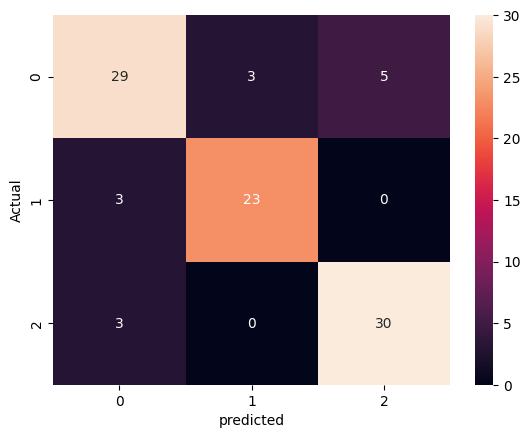

In [344]:
sns.heatmap(confusion_matrix, annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Actual')

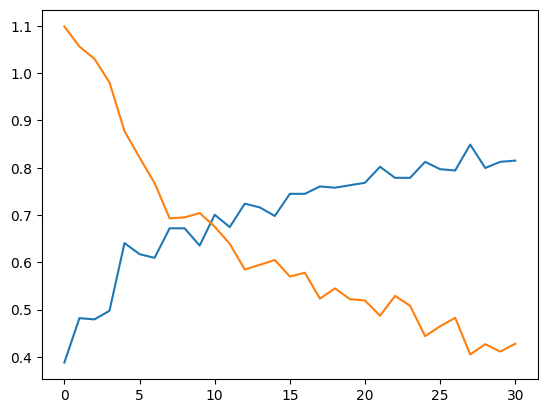

In [345]:
plt.plot(ann.history['accuracy'])
plt.plot(ann.history['loss'])


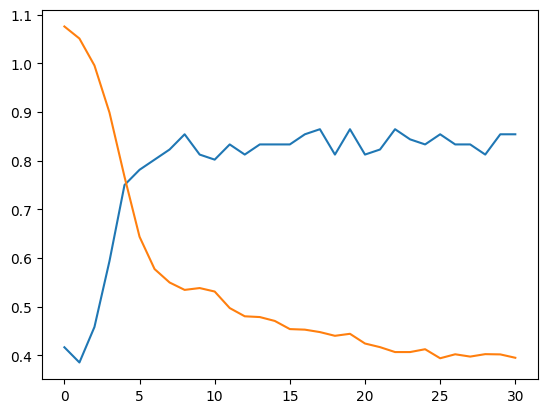

In [346]:
plt.plot(ann.history['val_accuracy'])
plt.plot(ann.history['val_loss'])

In [358]:
#Hyperparameter tuning

param_grid = {
    'batch_size': [16, 32, 64],
    'learning_rate': [0.001, 0.01, 0.1],

}

grid = ParameterGrid(param_grid)

best_accuracy = 0
best_params = {}

for params in grid:
    print(f"Testing parameters: {params}")

    #model with current parameters
    ann_eaxmple = keras.models.Sequential([
      keras.layers.Dense(100, input_shape=(60,), activation='relu'),
     Dropout(0.4),
     keras.layers.Dense(64, activation='relu'),
     Dropout(0.4),
     keras.layers.Dense(32, activation='relu'),
     keras.layers.Dense(16, activation='relu'),
     keras.layers.Dense(8, activation='relu'),
     keras.layers.Dense(3, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=params['learning_rate'])
    ann_example.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    ann = ann_example.fit(x_train, y_train,
                        batch_size=params['batch_size'],
                        epochs=50,
                        validation_data=(x_test, y_test),
                        verbose=0)

    # Evaluate the model
    evaluation = ann_example.evaluate(x_test, y_test, verbose=0)
    validation_accuracy = evaluation[1]

    # Update best parameters if current model is better
    if validation_accuracy > best_accuracy:
        best_accuracy = validation_accuracy
        best_params = params
print(f"\n\n----------Results----------")
print(f"Best parameters: {best_params}")
print(f"Best validation accuracy: {best_accuracy}")

Testing parameters: {'batch_size': 16, 'learning_rate': 0.001}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing parameters: {'batch_size': 16, 'learning_rate': 0.01}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing parameters: {'batch_size': 16, 'learning_rate': 0.1}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing parameters: {'batch_size': 32, 'learning_rate': 0.001}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing parameters: {'batch_size': 32, 'learning_rate': 0.01}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing parameters: {'batch_size': 32, 'learning_rate': 0.1}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing parameters: {'batch_size': 64, 'learning_rate': 0.001}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing parameters: {'batch_size': 64, 'learning_rate': 0.01}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Testing parameters: {'batch_size': 64, 'learning_rate': 0.1}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)




----------Results----------
Best parameters: {'batch_size': 16, 'learning_rate': 0.001}
Best validation accuracy: 0.3854166567325592
